https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement (TARGET)
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

**Resumen de datos**:
* year: 2016 para todos los puntos de datos
* month: número para el mes del año
* day: número para el día del año
* week: día de la semana como cadena de caracteres
* temp_2: temperatura máxima 2 días antes
* temp_1: temperatura máxima 1 día antes
* average: temperatura máxima promedio histórica
* actual: medición de temperatura máxima
* friend: la predicción de tu amigo, un número aleatorio entre 20 por debajo del promedio y 20 por encima del promedio


### 1. Importa el csv "temps.csv"

In [1]:
import pandas as pd
import numpy as np
import os 

from sklearn.tree import DecisionTreeClassifier
import datetime

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"

In [2]:
data_temp = pd.read_csv('data/temps.csv', sep=',')

In [3]:
# data_temp.head()
data_temp.tail()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42
347,2016,12,31,Sat,48,57,45.5,40,42,48,47,57


In [3]:
data_temp.shape

(348, 12)

In [5]:
data_temp.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [6]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [3]:
years = data_temp['year']
months = data_temp['month']
days = data_temp['day']

In [4]:
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

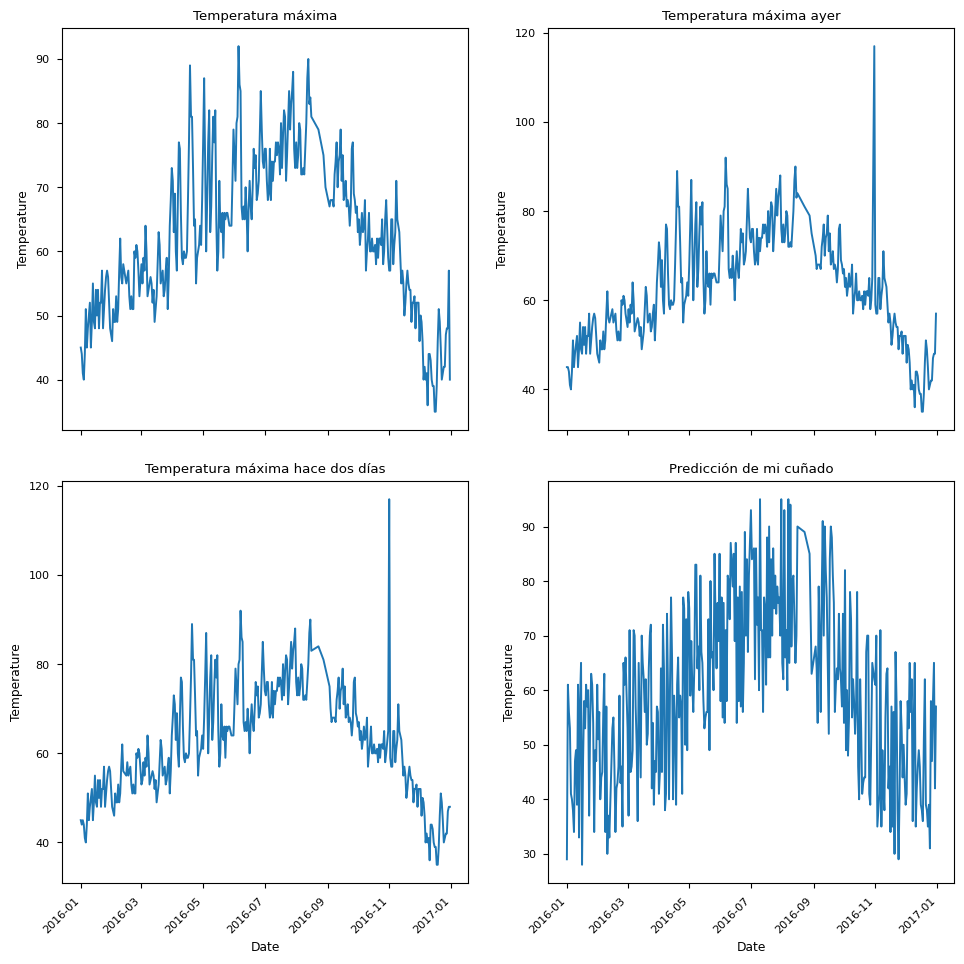

In [5]:
plt.style.use('seaborn-paper')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
fig.autofmt_xdate(rotation = 45)

ax1.plot(dates, data_temp['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Temperatura máxima')

ax2.plot(dates, data_temp['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Temperatura máxima ayer')

ax3.plot(dates, data_temp['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Temperatura máxima hace dos días')

ax4.plot(dates, data_temp['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Predicción de mi cuñado')

plt.tight_layout(pad=2)

### 2. Lidia con las variables categóricas del dataset

In [6]:
data_temp = pd.get_dummies(data_temp)

In [11]:
data_temp.head(7)

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0
5,2016,1,6,40,44,46.1,51,43,49,48,40,0,0,0,0,0,0,1
6,2016,1,7,44,51,46.2,45,45,49,46,38,0,0,0,0,1,0,0


In [7]:
data_temp2 = data_temp.copy()

In [73]:
data_temp2.shape

(348, 18)

### 3. Divide en train y test

In [11]:
X = data_temp2.drop('actual', axis=1)

y = np.array(data_temp2['actual'])

In [12]:
data_temp2_list = list(data_temp2.columns)

In [13]:
data_temp2 = np.array(data_temp2)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [15]:
print("X_TRAIN:", X_train.shape)
print("y_TRAIN:", y_train.shape)
print("X_TEST:", X_test.shape)
print("y_TEST:", y_test.shape)

X_TRAIN: (261, 17)
y_TRAIN: (261,)
X_TEST: (87, 17)
y_TEST: (87,)


### 4. Entrena el modelo
Utiliza un DecisionTreeRegressor

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
tree_clf = DecisionTreeClassifier(max_depth=1, random_state=42, min_samples_leaf=20)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=20, random_state=42)

### 5. Calcula su MAE
Sin usar sklearn

In [63]:
preds = X_test.iloc[:, data_temp2_list.index('average')]

preds_errors = abs(y_test - preds)

print(f'El error promedio absoluto (MAE): {round(np.mean(preds_errors), 2)}')

El error promedio absoluto (MAE): 5.06


In [68]:
mape = 100 * (preds_errors/y_test)

accuracy = 100 - np.mean(mape)

print(f'Precisión: {round(accuracy, 2)}%.')

Precisión: 92.3%.


### 6. Calcula su MAPE
Sin usar sklearn

In [41]:
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

print(f"MAPE Test: {mape(y_test, preds):.2f}")

MAPE Test: 0.08


### 7. Representa el árbol de decision

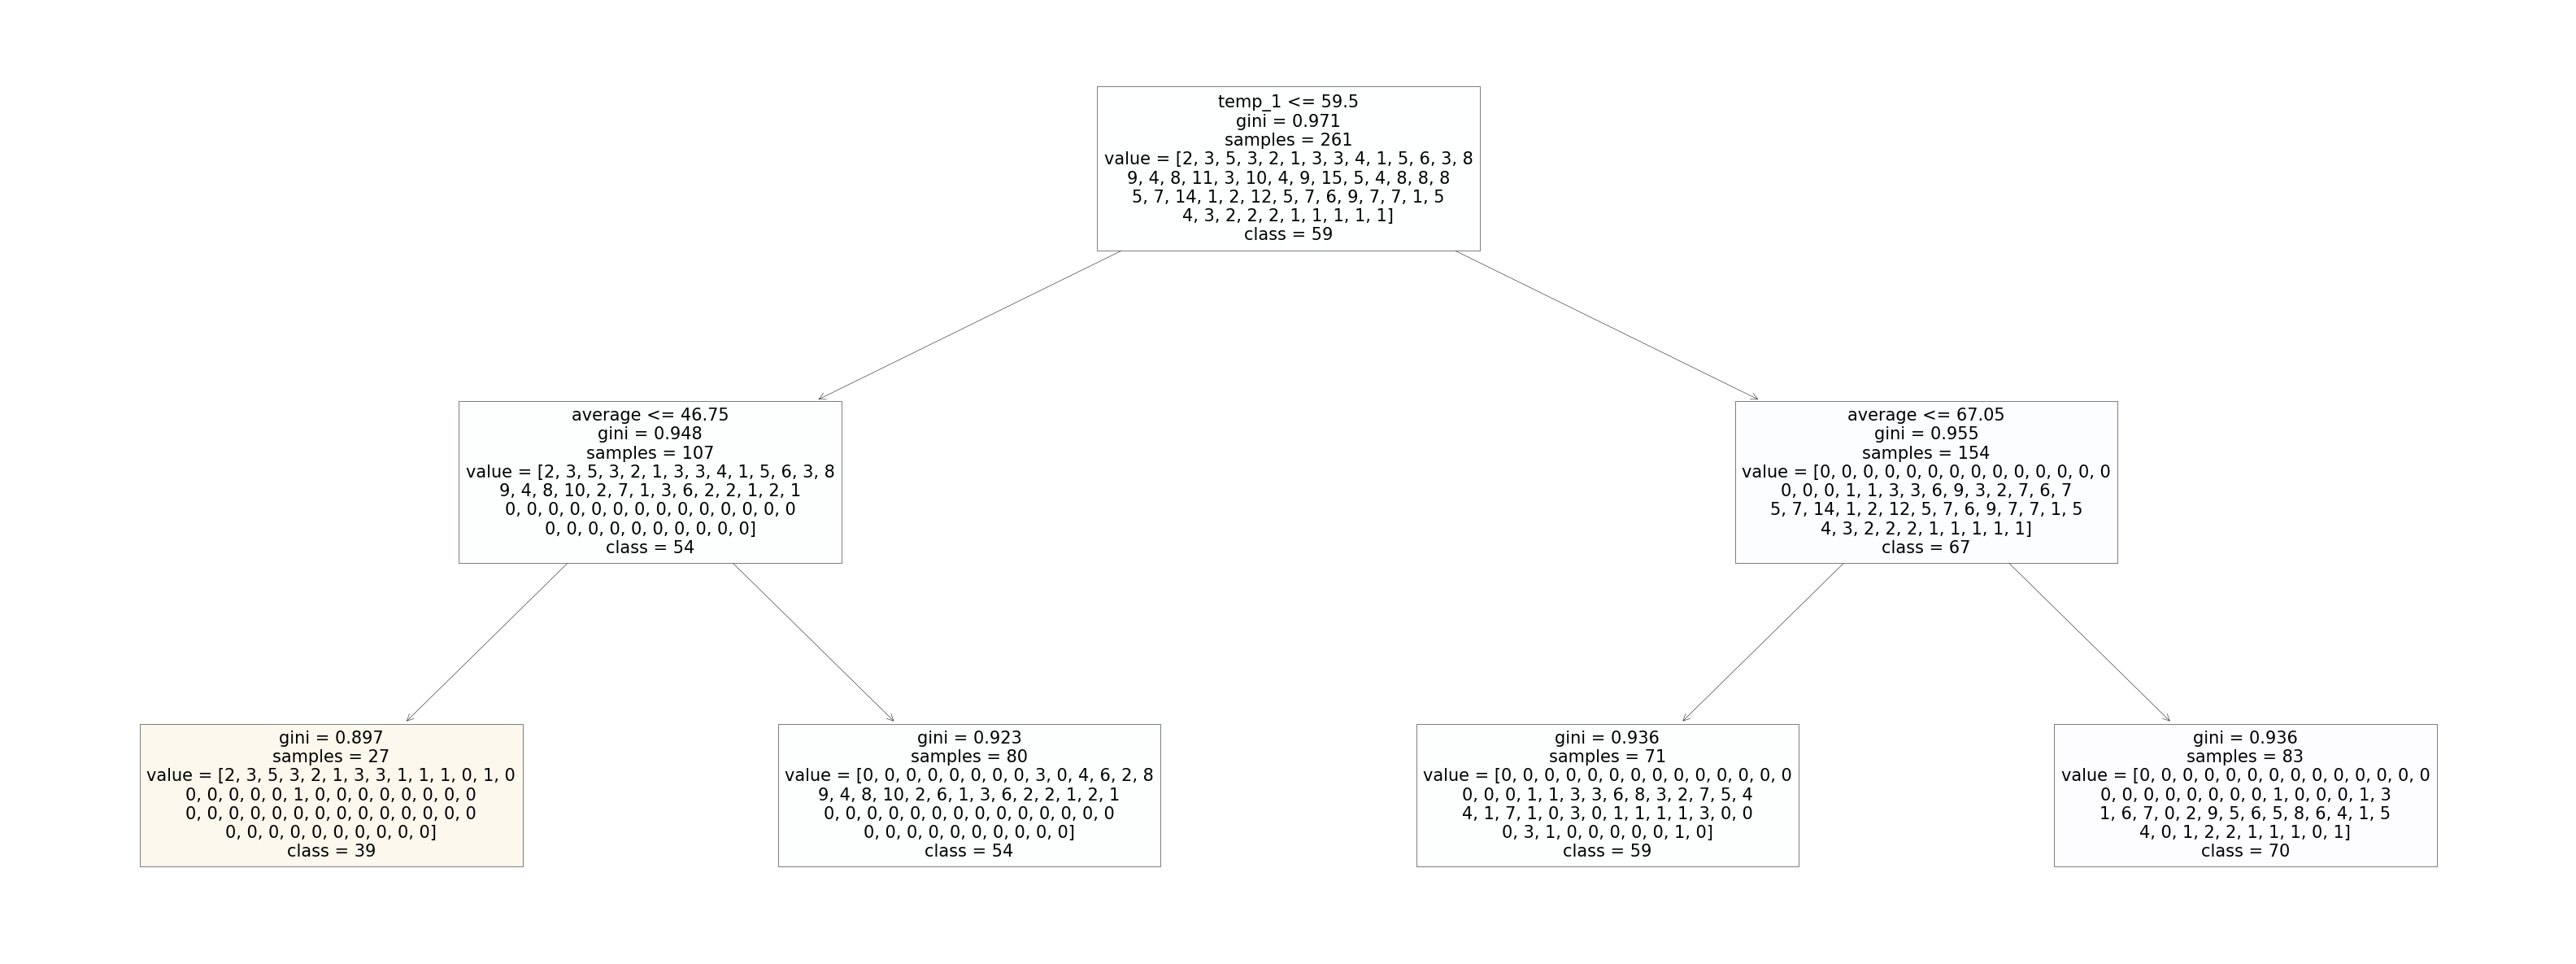

In [31]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (27, 10), dpi=150)

tree.plot_tree(tree_clf,
               feature_names=X_train.columns,
               class_names=np.unique(y).astype('str'),
               filled = True,
               fontsize=10);
plt.show()

### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

In [51]:
tree_clf2 = DecisionTreeClassifier(max_depth=3, random_state=0, min_samples_leaf=20)
tree_clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, random_state=0)

### 9. Vuelve a calcular si MAE

In [65]:
predictions = tree_clf2.predict(X_test)

errors = abs(y_test - predictions)

print(f'MAE: {round(np.mean(errors), 2)}')

MAE: 5.83


In [66]:
mape = 100 * (errors/y_test)

accuracy = 100 - np.mean(mape)

print(f'Precisión: {round(accuracy, 2)}%.')

Precisión: 91.07%.


### 10. Vuelve a representar su árbol

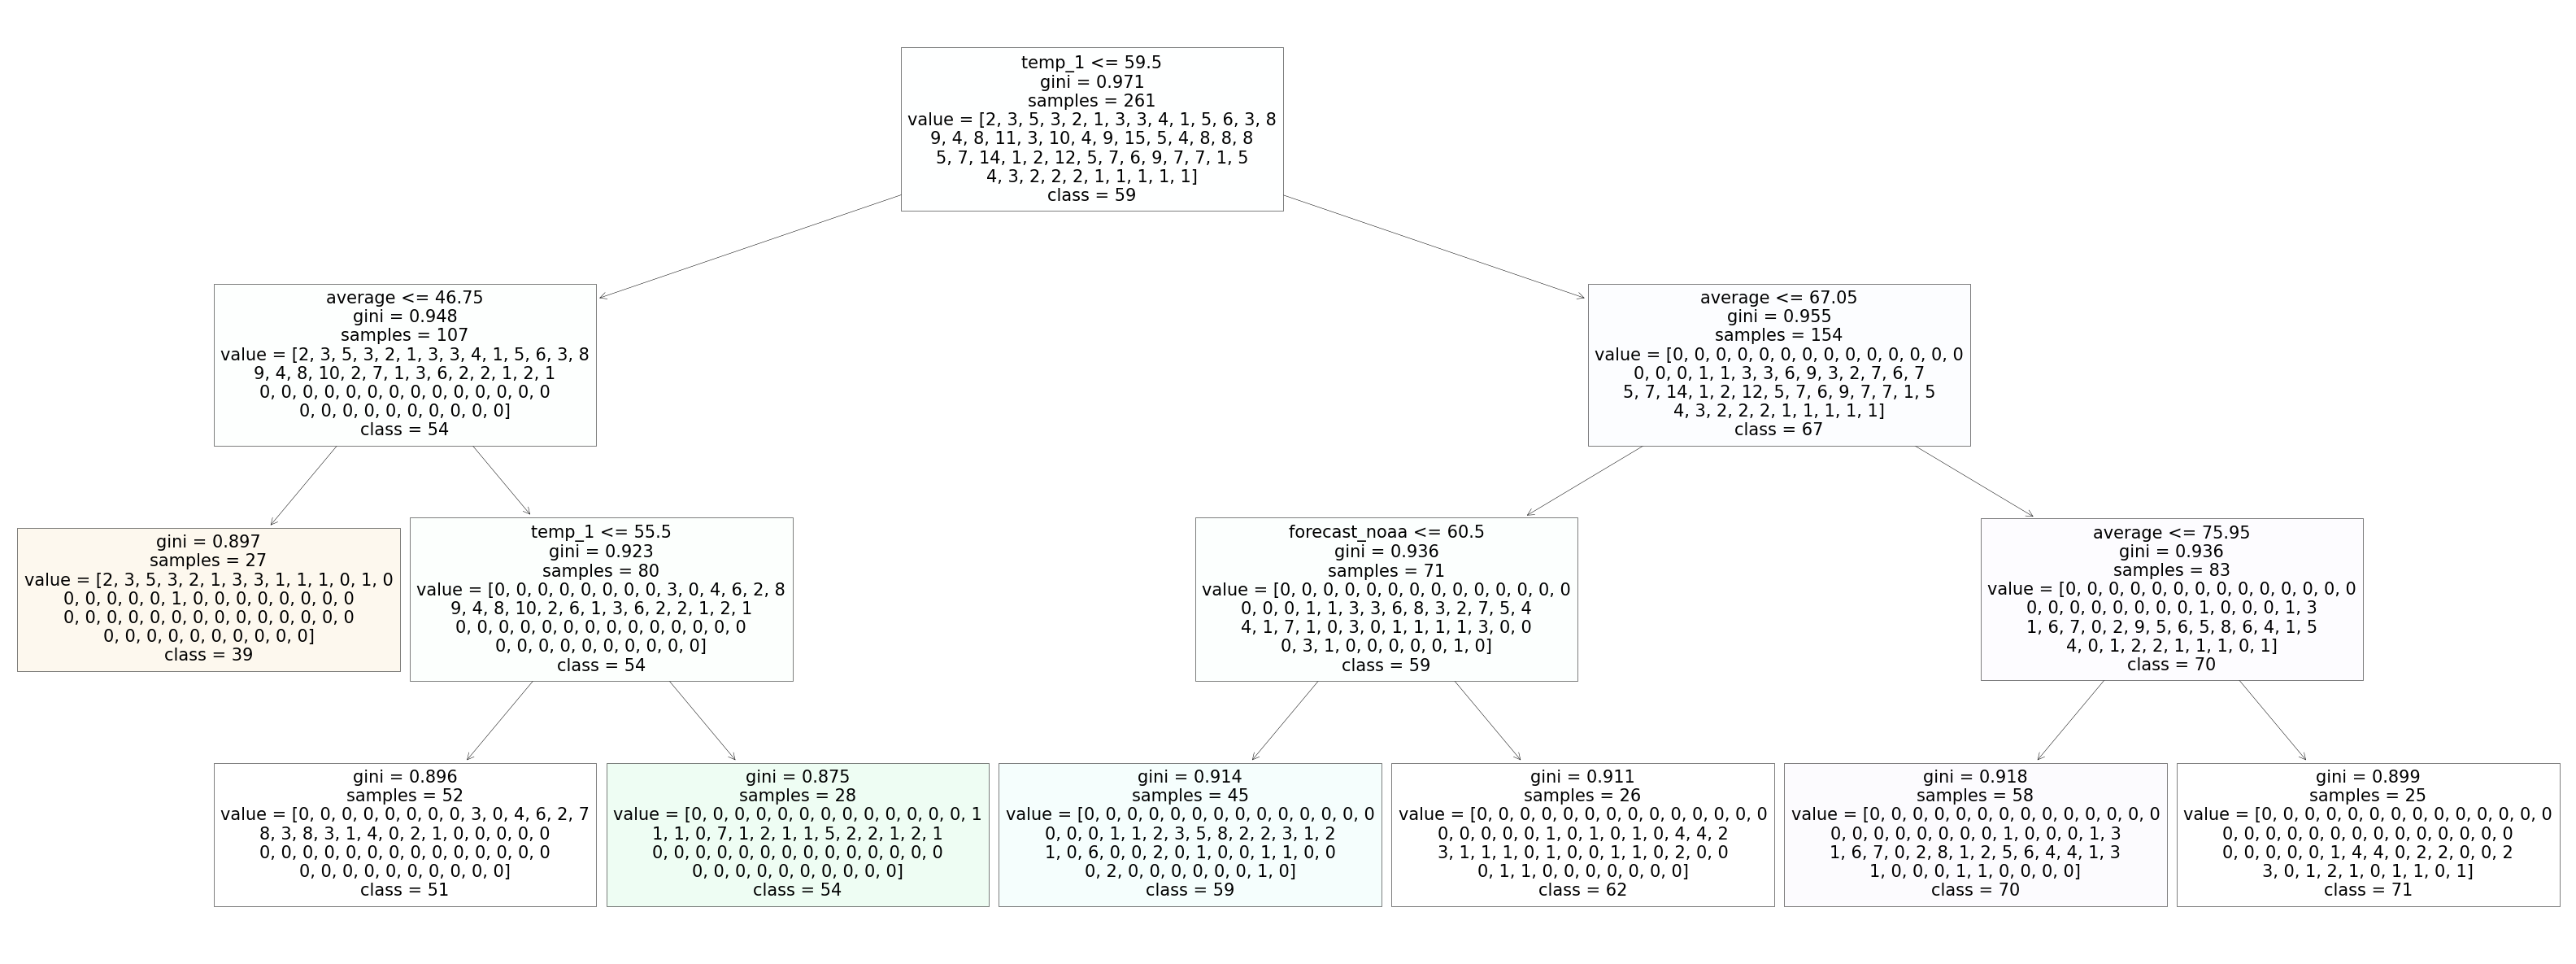

In [53]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (27, 10), dpi=150)

tree.plot_tree(tree_clf2,
               feature_names=X_train.columns,
               class_names=np.unique(y).astype('str'),
               filled = True,
               fontsize=10);
plt.show()

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [62]:
tree_clf2.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.43975116,
       0.46734779, 0.09290105, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [81]:
print(data_temp.columns)

Index(['year', 'month', 'day', 'temp_2', 'temp_1', 'average', 'actual',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend', 'week_Fri',
       'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs', 'week_Tues',
       'week_Wed'],
      dtype='object')


In [84]:
data_temp2 = ['year', 'month', 'day', 'temp_2', 'temp_1', 'average',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend', 'week_Fri',
       'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs', 'week_Tues',
       'week_Wed']

In [86]:
summary_table = pd.DataFrame({'Variables':data_temp2, 'Valores': tree_clf2.feature_importances_})
summary_table

,Variables,Valores
0,year,0.000000
1,month,0.000000
2,day,0.000000
3,temp_2,0.000000
4,temp_1,0.439751
5,average,0.467348
6,forecast_noaa,0.092901
7,forecast_acc,0.000000
8,forecast_under,0.000000
9,friend,0.000000


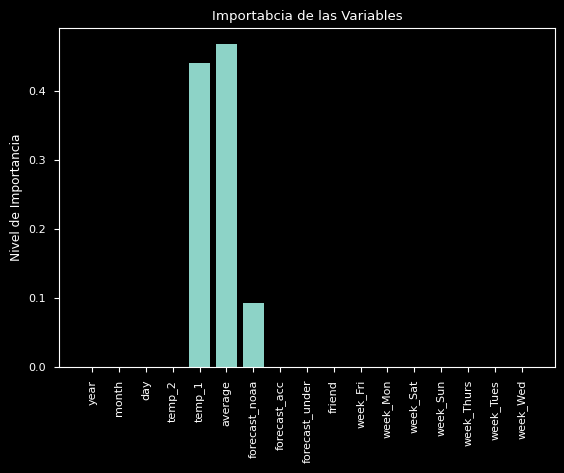

In [99]:
plt.style.use('dark_background')

x = np.arange(len(tree_clf2.feature_importances_))
y = list(tree_clf2.feature_importances_)

plt.xticks(x, data_temp2, rotation='vertical')
plt.bar(x,y,orientation='vertical')
plt.ylabel('Nivel de Importancia')
plt.title('Importabcia de las Variables')
plt.show()